In [129]:
import torch
from colorization_unet import ColorizationUNet
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

model = ColorizationUNet()
# 创建一个示例灰度图像，尺寸为(1, 1, 160, 160)
input_image = torch.randn(1, 1, 160, 160)
# 前向传播
output_image = model(input_image)
print(output_image.shape)  # 输出尺寸应为(1, 3, 160, 160)


torch.Size([1, 3, 160, 160])


In [130]:
model.eval()

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [131]:

# 将模型移动到GPU（如果可用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [132]:
model.load_state_dict(torch.load('./checkpoints/colorization_epoch_50.pth', map_location=device, weights_only=True))

<All keys matched successfully>

In [133]:
model.eval()

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [134]:
import torchvision.transforms as transforms

In [135]:
# 定义与训练时相同的变换
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

In [136]:
import numpy as np
from PIL import Image

In [137]:
# 加载灰度图像并预处理
gray_image = Image.open('landscape/color/0.jpg').convert('L')
gray_tensor = transform(gray_image).unsqueeze(0).to(device)  # 添加批次维度并移动到设备

np.array(gray_image).shape

(150, 150)

In [138]:
# 使用模型进行预测
with torch.no_grad():
    output_color = model(gray_tensor)

# 将输出转换为图像并保存
output_color = output_color.squeeze(0).cpu().numpy()  # 移除批次维度并移动到 CPU
output_img = np.transpose(output_color, (1, 2, 0))  # 调整维度顺序为 [H, W, C]


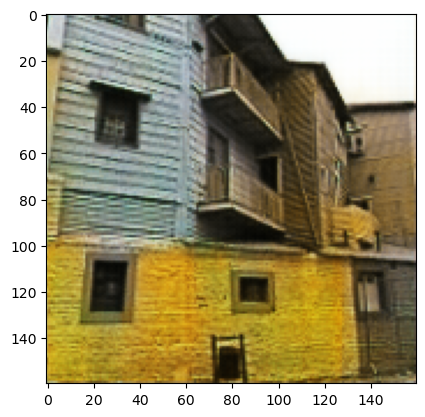

In [139]:
def img2grey(img_path):
    return Image.open(img_path).convert('L')


def colorized(model, img_path):
    # 加载灰度图像并预处理
    gray_image = img2grey(img_path)

    gray_tensor = transform(gray_image).unsqueeze(0).to(device)  # 添加批次维度并移动到设备
    # 使用模型进行预测
    with torch.no_grad():
        output_color = model(gray_tensor)

    # 将输出转换为图像并保存
    output_color = output_color.squeeze(0).cpu().numpy()  # 移除批次维度并移动到 CPU
    output_img = np.transpose(output_color, (1, 2, 0))  # 调整维度顺序为 [H, W, C]
    return gray_image, output_img


gray_image, output_img = colorized(model, 'landscape/gray/1.jpg')
plt.imshow(output_img)


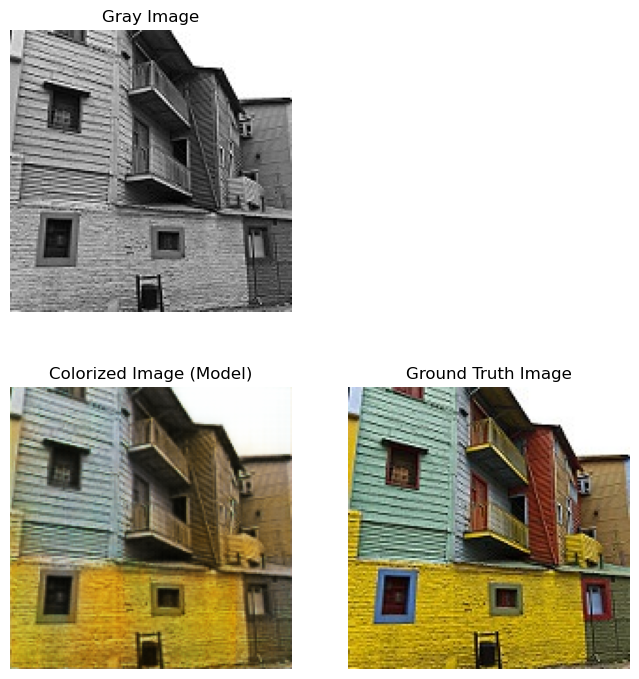

In [140]:
# 调用colorized函数，获取灰度图像和生成的彩色图像
gray_image, output_img = colorized(model, 'landscape/gray/1.jpg')

# 加载 Ground Truth 彩色图像
ground_truth = Image.open('landscape/color/1.jpg')

# 创建一个图像窗口，并设置显示多个图像的布局
plt.figure(figsize=(8, 8.5
                    ))

# 第一个子图：灰度图像
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')  # 显示灰度图像，使用灰度颜色映射
plt.title('Gray Image')
plt.axis('off')  # 隐藏坐标轴

# 第二个子图：模型生成的彩色图像
plt.subplot(2, 2, 3)
plt.imshow(output_img)  # 显示模型生成的彩色图像
plt.title('Colorized Image (Model)')
plt.axis('off')  # 隐藏坐标轴

# 第三个子图：Ground Truth 彩色图像
plt.subplot(2, 2, 4)
plt.imshow(ground_truth)  # 显示真实的彩色图像 (Ground Truth)
plt.title('Ground Truth Image')
plt.axis('off')  # 隐藏坐标轴

plt.savefig('img.png', bbox_inches='tight')

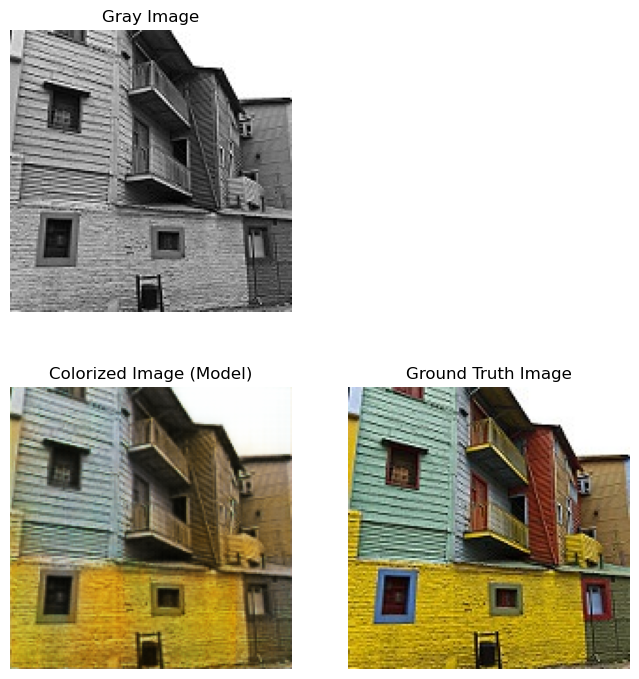

In [141]:
# 调用colorized函数，获取灰度图像和生成的彩色图像
gray_image, output_img = colorized(model, 'landscape/gray/1.jpg')

# 加载 Ground Truth 彩色图像
ground_truth = Image.open('landscape/color/1.jpg')

# 创建一个图像窗口，并设置显示多个图像的布局
plt.figure(figsize=(8, 8.5
                    ))

# 第一个子图：灰度图像
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')  # 显示灰度图像，使用灰度颜色映射
plt.title('Gray Image')
plt.axis('off')  # 隐藏坐标轴

# 第二个子图：模型生成的彩色图像
plt.subplot(2, 2, 3)
plt.imshow(output_img)  # 显示模型生成的彩色图像
plt.title('Colorized Image (Model)')
plt.axis('off')  # 隐藏坐标轴

# 第三个子图：Ground Truth 彩色图像
plt.subplot(2, 2, 4)
plt.imshow(ground_truth)  # 显示真实的彩色图像 (Ground Truth)
plt.title('Ground Truth Image')
plt.axis('off')  # 隐藏坐标轴

plt.savefig('img.png', bbox_inches='tight')

In [142]:
# import os
# from PIL import Image
# import matplotlib.pyplot as plt
# 
# def colorized(model, img_path):
#     # 加载灰度图像并预处理
#     gray_image = Image.open(img_path).convert('L')
# 
#     gray_tensor = transform(gray_image).unsqueeze(0).to(device)  # 添加批次维度并移动到设备
#     # 使用模型进行预测
#     with torch.no_grad():
#         output_color = model(gray_tensor)
# 
#     # 将输出转换为图像并保存
#     output_color = output_color.squeeze(0).cpu().numpy()  # 移除批次维度并移动到 CPU
#     output_img = np.transpose(output_color, (1, 2, 0))  # 调整维度顺序为 [H, W, C]
#     return gray_image, output_img
# 
# # 定义路径
# gray_folder = 'landscape/gray'
# color_folder = 'landscape/color'
# output_folder = './output'
# 
# # 如果输出文件夹不存在，则创建
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)
# 
# # 遍历灰度图像文件夹
# for gray_filename in os.listdir(gray_folder):
#     if gray_filename.endswith('.jpg'):  # 确保是图像文件
#         gray_path = os.path.join(gray_folder, gray_filename)
#         color_path = os.path.join(color_folder, gray_filename)  # 假设灰度和彩色图像同名
# 
#         if os.path.exists(color_path):  # 确保对应的彩色图像存在
#             # 获取灰度图像和模型生成的彩色图像
#             gray_image, output_img = colorized(model, gray_path)
# 
#             # 加载 Ground Truth 彩色图像
#             ground_truth = Image.open(color_path)
# 
#             # 创建一个图像窗口，并设置显示多个图像的布局
#             plt.figure(figsize=(8, 8.5))
# 
#             # 第一个子图：灰度图像
#             plt.subplot(2, 2, 1)
#             plt.imshow(gray_image, cmap='gray')  # 显示灰度图像，使用灰度颜色映射
#             plt.title('Gray Image')
#             plt.axis('off')  # 隐藏坐标轴
# 
#             # 第二个子图：模型生成的彩色图像
#             plt.subplot(2, 2, 3)
#             plt.imshow(output_img)  # 显示模型生成的彩色图像
#             plt.title('Colorized Image (Model)')
#             plt.axis('off')  # 隐藏坐标轴
# 
#             # 第三个子图：Ground Truth 彩色图像
#             plt.subplot(2, 2, 4)
#             plt.imshow(ground_truth)  # 显示真实的彩色图像 (Ground Truth)
#             plt.title('Ground Truth Image')
#             plt.axis('off')  # 隐藏坐标轴
# 
#             # 保存结果到 output 文件夹，文件名和输入的灰度图像同名
#             output_path = os.path.join(output_folder, gray_filename)
#             plt.savefig(output_path, bbox_inches='tight')
#             plt.close()  # 关闭当前图像窗口以释放内存


In [143]:
# !jupyter nbconvert --to markdown infer.ipynb